<a href="https://colab.research.google.com/github/ertgrulyksk/Airbnb_New_User_Bookings/blob/main/Airbnb_New_User_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
print("There were", train_users.shape[0], "users in the training set and", test_users.shape[0], "in the test set.")
print("In total there were", train_users.shape[0] + test_users.shape[0], "users.")

There were 213451 users in the training set and 62096 in the test set.
In total there were 275547 users.


In [2]:
df = pd.concat((train_users, test_users), axis = 0, ignore_index = True)

In [3]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [4]:
df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [5]:
df['gender'].unique(), df['first_browser'].unique()

(array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object),
 array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
        'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
        'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
        'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
        'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
        'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
        'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
        'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
        'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
        'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
        'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
        'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon', 'IBrowse',
        'Nintendo Browser', 'UC Browser'], dtype=object))

In [6]:
df.gender.replace('-unknown-', np.nan, inplace = True)
df.first_browser.replace('-unknown-', np.nan, inplace = True)

In [7]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
country_destination         62096
dtype: int64

In [8]:
df.drop('date_first_booking', axis = 1, inplace = True)

In [9]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
country_destination         62096
dtype: int64

In [10]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [11]:
df.loc[df['age'] > 1000]['age'].describe()

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [12]:
df.loc[df['age'] < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [13]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']

In [14]:
df.age.describe()

count    158681.000000
mean         36.713274
std          14.046364
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         150.000000
Name: age, dtype: float64

In [15]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan

In [16]:
df['age'].describe()

count    155887.000000
mean         36.033370
std          11.589997
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


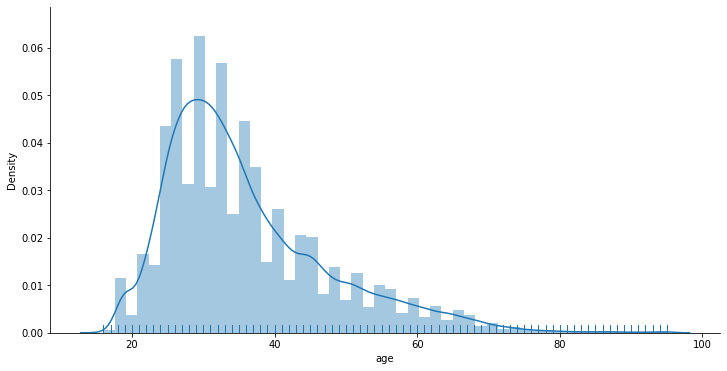

In [17]:
plt.figure(figsize = (12, 6))
sns.distplot(df.age.dropna(), rug = True)
sns.despine()

In [18]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


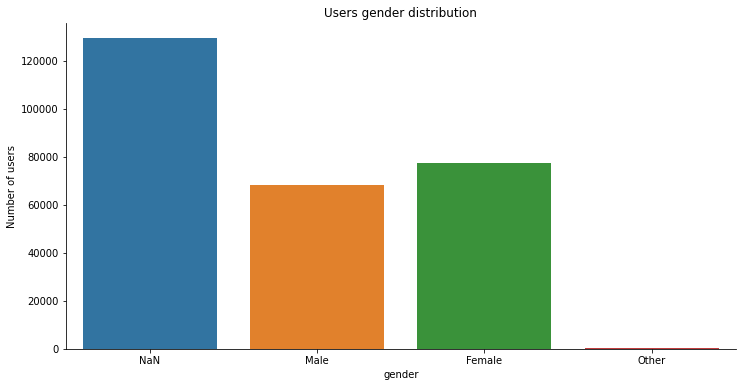

In [19]:
plt.figure(figsize = (12, 6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data = df, x = 'gender')
plt.xticks(np.arange(4), ("NaN", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()

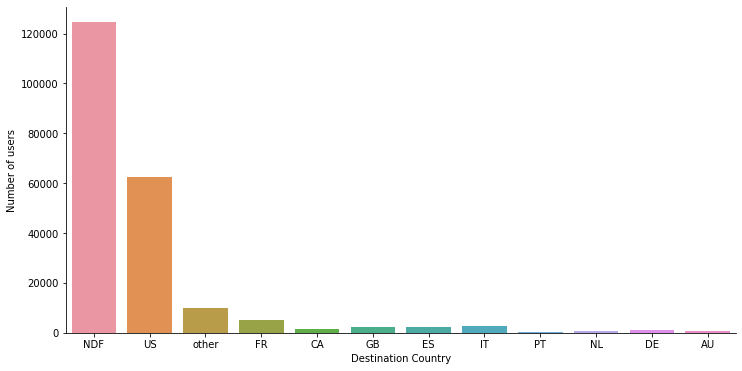

In [20]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
sns.despine()

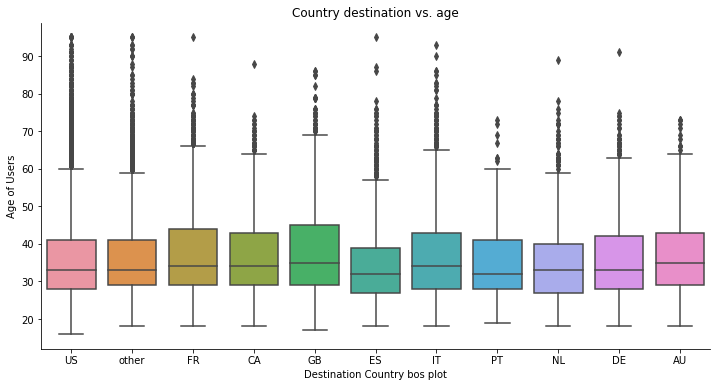

In [21]:
plt.figure(figsize = (12, 6))
df_without_NDF = df[df['country_destination']!= 'NDF']
sns.boxplot(y = 'age', x = 'country_destination', data = df_without_NDF)
plt.xlabel('Destination Country bos plot')
plt.ylabel('Age of Users')
plt.title('Country destination vs. age')
sns.despine()

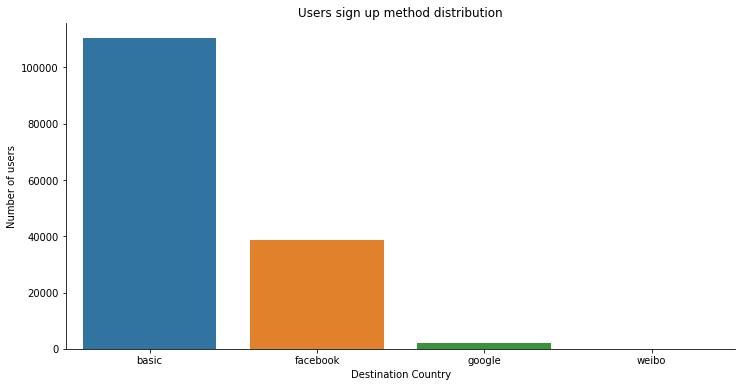

In [22]:
plt.figure(figsize = (12 ,6))
df_without_NDF = df[df['country_destination']!= 'NDF']
sns.countplot(x = 'signup_method', data = df_without_NDF)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method distribution')
sns.despine()

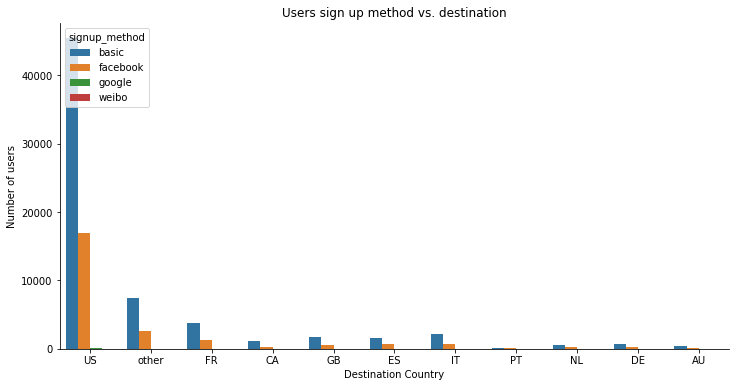

In [23]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destination')
sns.despine()

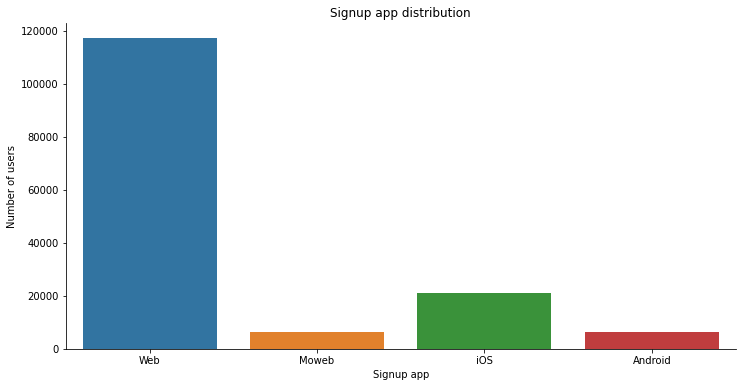

In [24]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'signup_app', data = df_without_NDF)
plt.xlabel('Signup app')
plt.ylabel('Number of users')
plt.title('Signup app distribution')
sns.despine()

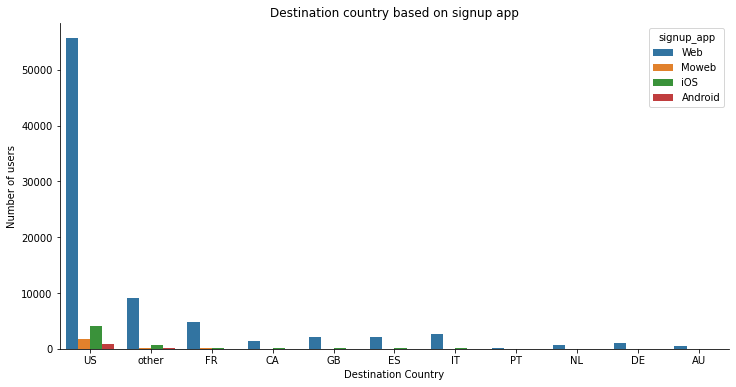

In [25]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF, hue = 'signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destination country based on signup app')
sns.despine()

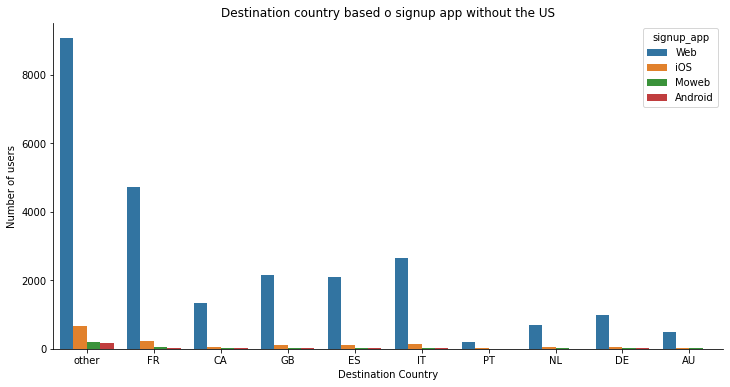

In [26]:
df_without_NDF_US = df_without_NDF[df_without_NDF['country_destination']!='US']
plt.figure(figsize = (12 ,6))
sns.countplot(x = 'country_destination', data = df_without_NDF_US, hue = 'signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destination country based o signup app without the US')
sns.despine()

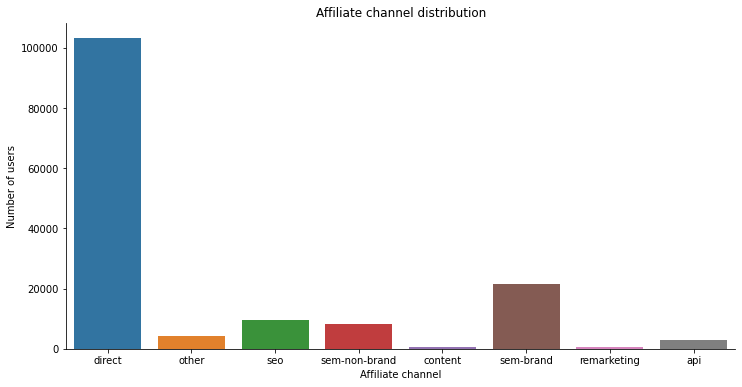

In [27]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'affiliate_channel', data = df_without_NDF)
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel distribution')
sns.despine()

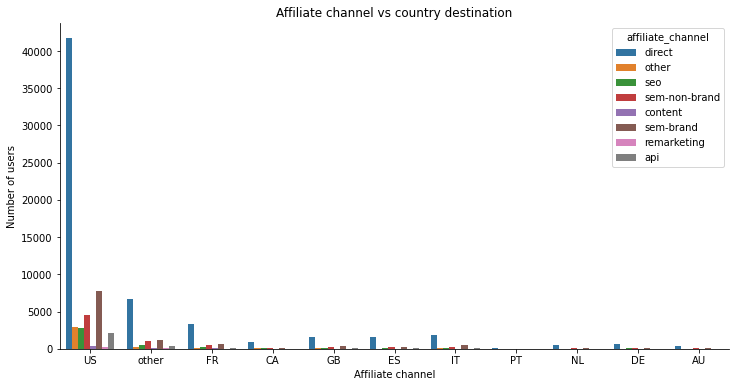

In [28]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination')
sns.despine()

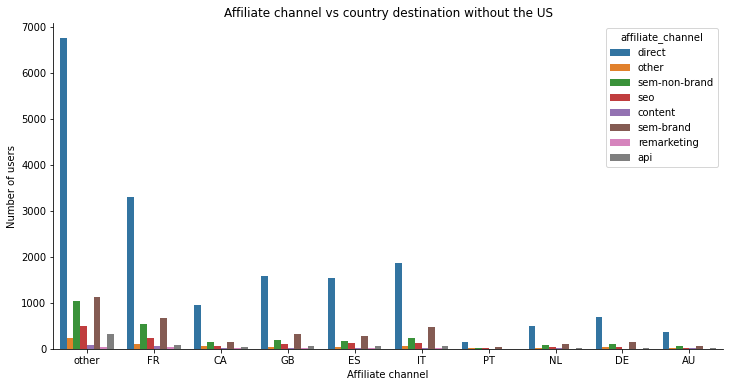

In [29]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF_US, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination without the US')
sns.despine()

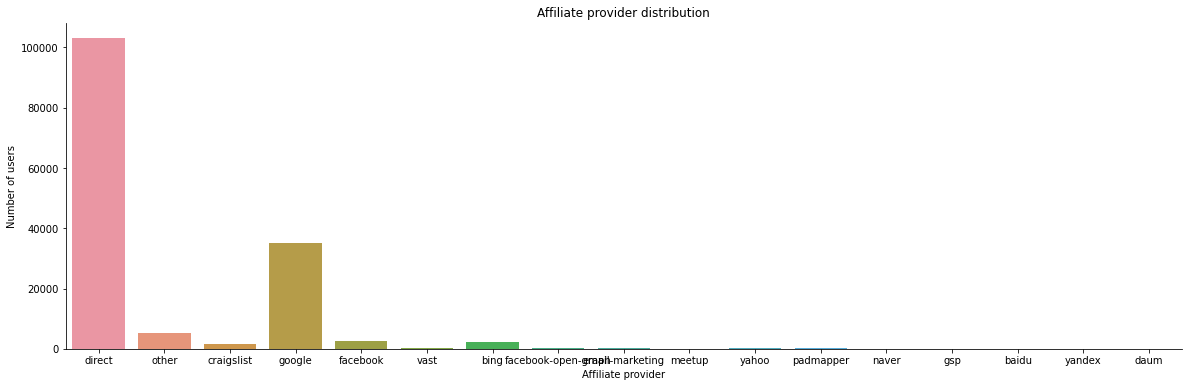

In [30]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'affiliate_provider', data = df_without_NDF)
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider distribution')
sns.despine()

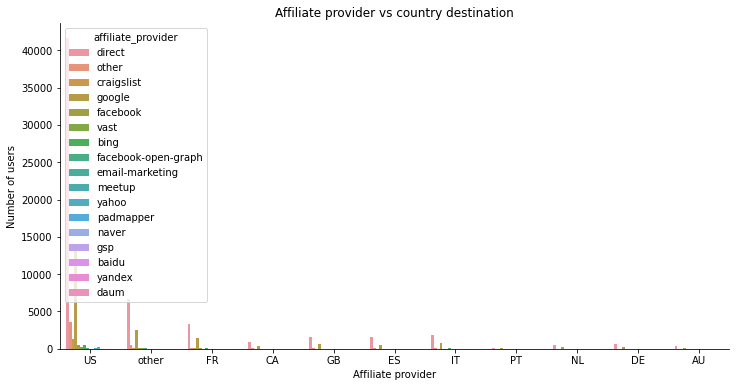

In [31]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination')
sns.despine()

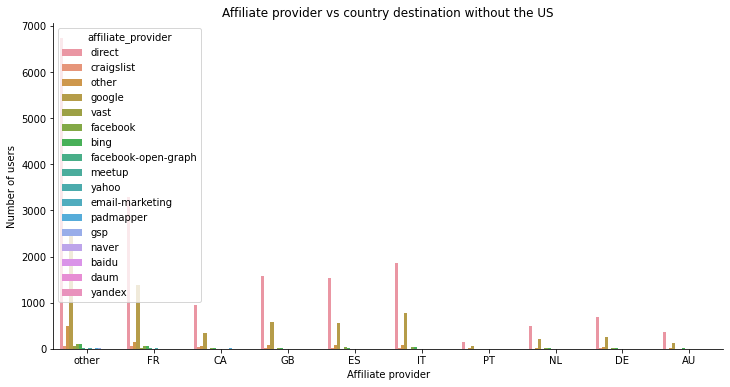

In [32]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF_US, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination without the US')
sns.despine()

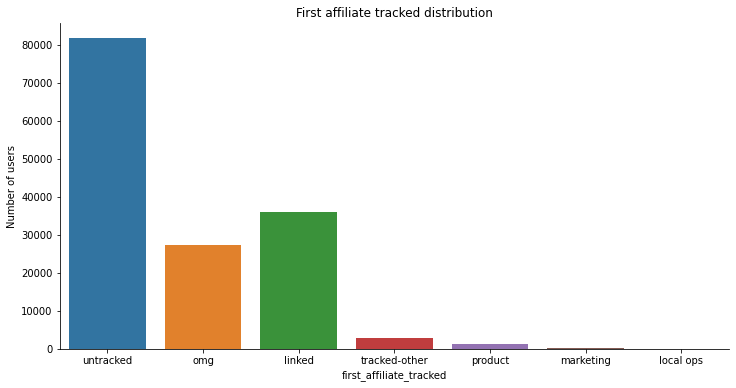

In [33]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'first_affiliate_tracked', data = df_without_NDF)
plt.ylabel('Number of users')
plt.title('First affiliate tracked distribution')
sns.despine()

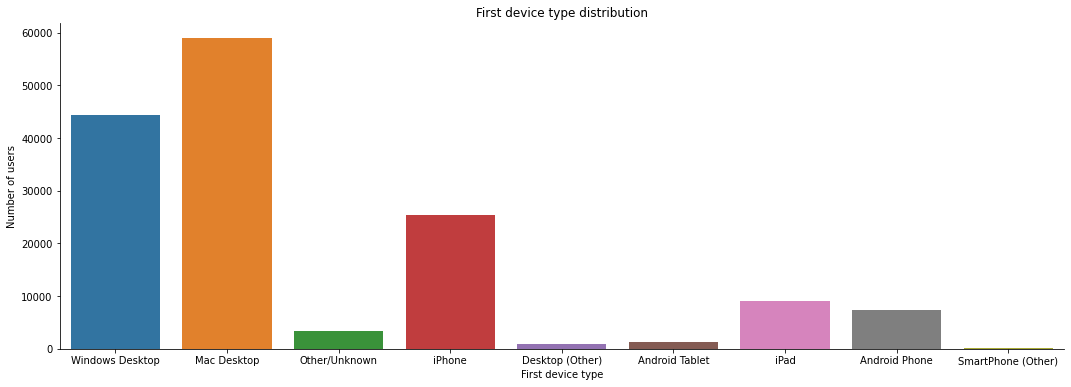

In [34]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'first_device_type', data = df_without_NDF)
plt.xlabel('First device type')
plt.ylabel('Number of users')
plt.title('First device type distribution')
sns.despine()

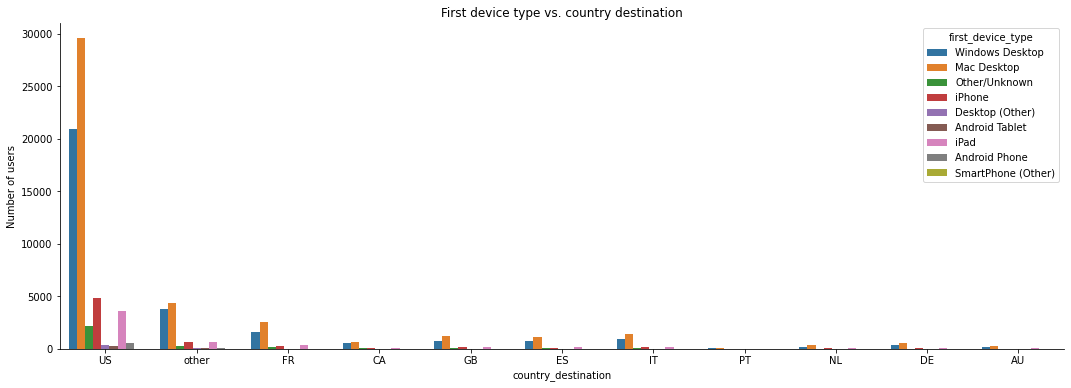

In [35]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF, hue = 'first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination')
sns.despine()

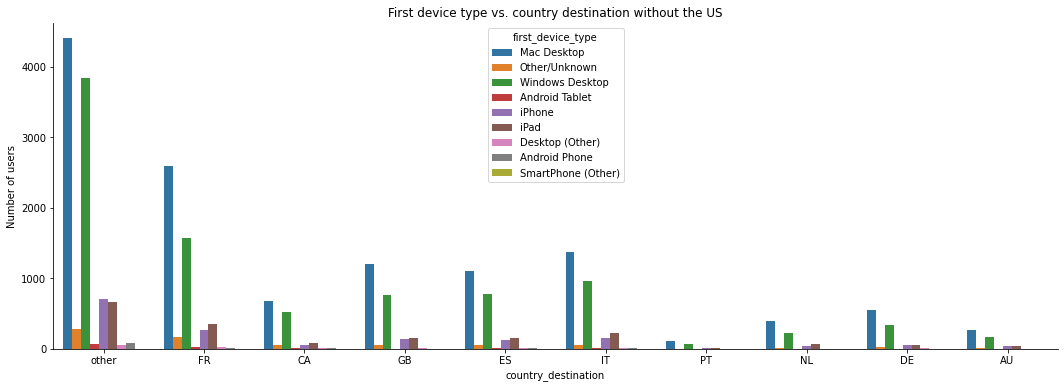

In [36]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'country_destination', data = df_without_NDF_US, hue = 'first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination without the US')
sns.despine()

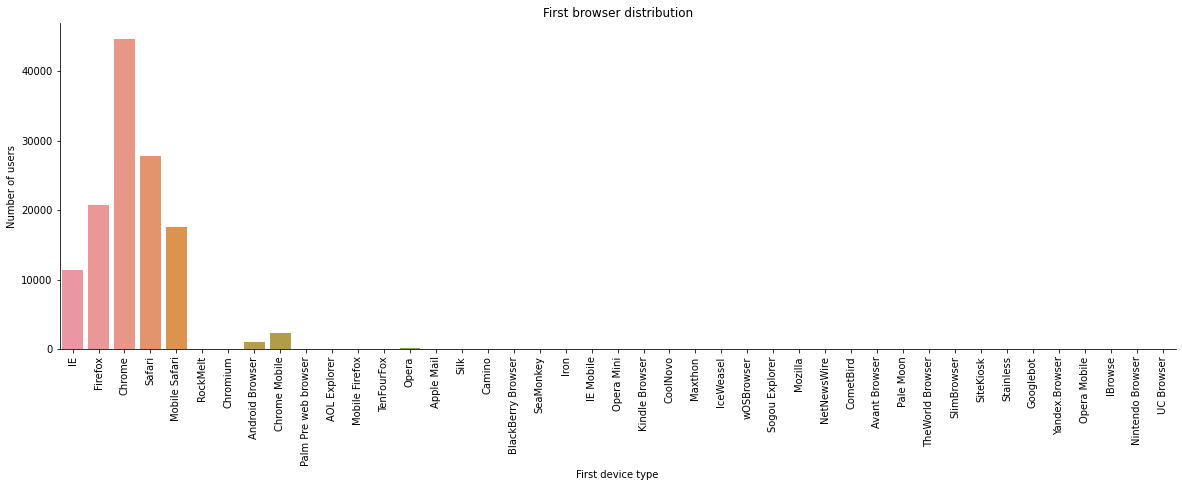

In [37]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'first_browser', data = df_without_NDF)
plt.xlabel('First device type')
plt.ylabel('Number of users')
plt.title('First browser distribution')
plt.xticks(rotation = 90)
sns.despine()

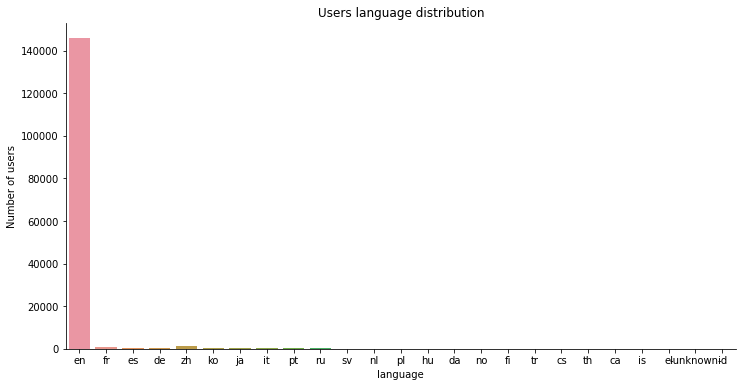

In [38]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'language', data = df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

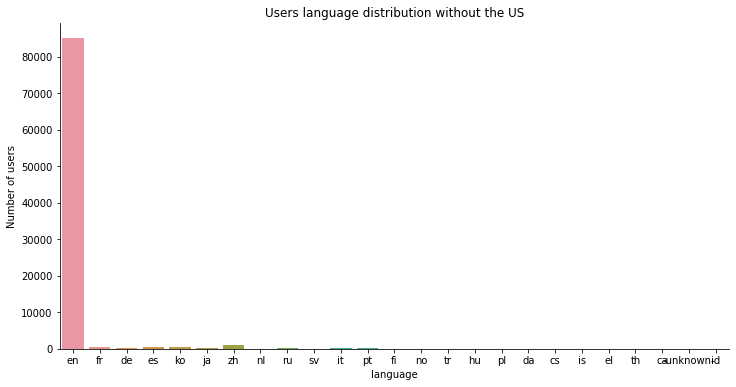

In [39]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'language', data = df_without_NDF_US)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution without the US')
sns.despine()

In [40]:
df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF['date_account_created'])
df_without_NDF['timestamp_first_active'] = pd.to_datetime((df_without_NDF.timestamp_first_active // 1000000), format='%Y%m%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:

df_without_NDF.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,M,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01,M,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


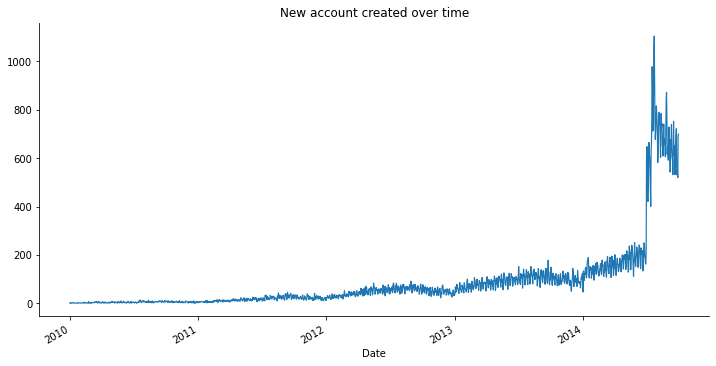

In [42]:
plt.figure(figsize = (12, 6))
df_without_NDF.date_account_created.value_counts().plot(kind = 'line', linewidth = 1.2)
plt.xlabel('Date')
plt.title('New account created over time')
sns.despine()

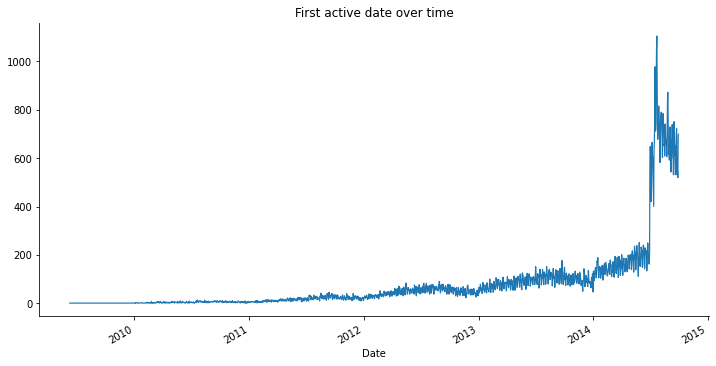

In [43]:
plt.figure(figsize = (12, 6))
df_without_NDF.timestamp_first_active.value_counts().plot(kind = 'line', linewidth = 1.2)
plt.xlabel('Date')
plt.title('First active date over time')
sns.despine()

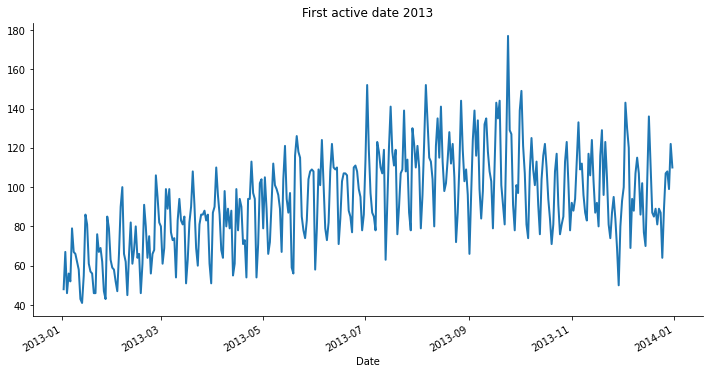

In [44]:
df_2013 = df_without_NDF[df_without_NDF['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
df_2013 = df_2013[df_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
plt.figure(figsize = (12, 6))
df_2013.timestamp_first_active.value_counts().plot(kind = 'line', linewidth = 2)
plt.xlabel('Date')
plt.title('First active date 2013')
sns.despine()

In [45]:
sessions = pd.read_csv('sessions.csv')

print("There were", len(sessions.user_id.unique()), " unique user IDs in the session data.")

There were 135484  unique user IDs in the session data.


In [46]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [47]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [48]:
sessions.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [49]:

sessions.action_type.replace('-unknown-', np.nan, inplace = True)

In [50]:

sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [51]:
sessions.action.value_counts().head(10)

show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64

In [52]:

sessions.action_detail.value_counts().head(10)

view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
Name: action_detail, dtype: int64

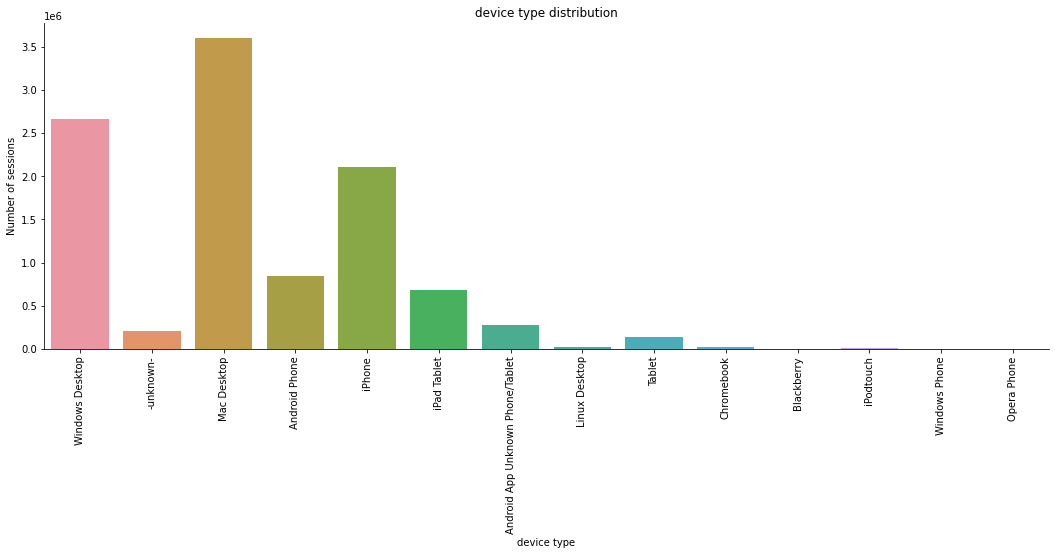

In [53]:
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=sessions)
plt.xlabel('device type')
plt.ylabel('Number of sessions')
plt.title('device type distribution')
plt.xticks(rotation=90)
sns.despine()

In [54]:
df_without_NDF.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,M,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01,M,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [55]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [56]:
booker_session = pd.merge(df_without_NDF, sessions, how = 'left', left_on = 'id', right_on = 'user_id')

In [57]:
booker_session.action_type.value_counts()

view                2628056
data                1424342
click               1407379
submit               401099
message_post          63657
booking_request       17148
partner_callback      15846
modify                 1138
booking_response          3
Name: action_type, dtype: int64

In [58]:
booker_session.action.value_counts().head(10)

show                     2005032
index                     587329
search_results            496105
personalize               466865
search                    393579
ajax_refresh_subtotal     327699
reviews                   251680
social_connections        239624
update                    220453
similar_listings          202863
Name: action, dtype: int64

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
df = pd.concat((train_users, test_users), axis=0, ignore_index=True)
df.drop('date_first_booking', axis=1, inplace=True)

In [63]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')

In [64]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan
df['age'].fillna(-1, inplace=True)

In [67]:
sessions = pd.read_csv('sessions.csv')
sessions.rename(columns={'user_id': 'id'}, inplace=True)
action_count = sessions.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = sessions.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = sessions.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()

sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')

sessions_data['most_used_device'] = sessions.groupby('id')['device_type'].max()

In [68]:
print('There were', sessions.shape[0], 'recorded sessions to which there were', sessions.id.nunique(), 'unique users.')


There were 10567737 recorded sessions to which there were 135483 unique users.


In [69]:
sessions_data.index.names = ['id']
sessions_data.reset_index(inplace=True)

In [71]:
secs_elapsed.head()

0              319.0
1            67753.0
2              301.0
3            22141.0
4              435.0
              ...   
10567721       447.0
10567722    124020.0
10567723     22920.0
10567724    575816.0
10567725     57382.0
Name: secs_elapsed, Length: 654717, dtype: float64

In [72]:
print('There are', df.id.nunique(), 'users from the entire user data set that have session information.')

There are 275547 users from the entire user data set that have session information.


In [74]:
df.set_index('id', inplace=True)
train_df = df.loc[train_users['id']]
test_df = df.loc[test_users['id']].drop('country_destination', axis=1)
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.fillna(-1, inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder

y_train = train_df['country_destination']
train_df.drop(['country_destination', 'id'], axis=1, inplace=True)
x_train = train_df.values

label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)

In [76]:
def ndcg_score(preds, dtrain):
    labels = dtrain.get_label()
    top = []

    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[::-1][:5])

    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg', score